### Introduction
●	To perform descriptive analytics, visualize data distributions, and preprocess the dataset for further analysis.


## Descriptive Analytics for Numerical Columns.
#### 	Objective: To compute and analyze basic statistical measures for numerical columns in the datasettics.
tistics.


In [5]:
# Load the dataset into a data analysis tool or programming environment (e.g., Python with pandas library)
import pandas as pd
df = pd.read_csv("sales_data_with_discounts.csv")
df.head()

,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,01-04-2021,Thursday,M01,C,15,Mobiles,RealU,RU-10,12100,181500,11.654820,21153.498820,160346.501180
1,01-04-2021,Thursday,M02,C,10,Mobiles,RealU,RU-9 Plus,10100,101000,11.560498,11676.102961,89323.897039
2,01-04-2021,Thursday,M03,C,7,Mobiles,YouM,YM-99,16100,112700,9.456886,10657.910157,102042.089843
3,01-04-2021,Thursday,M04,C,6,Mobiles,YouM,YM-99 Plus,20100,120600,6.935385,8364.074702,112235.925298
4,01-04-2021,Thursday,M05,C,3,Mobiles,YouM,YM-98,8100,24300,17.995663,4372.946230,19927.053770


In [10]:
# Identify numerical columns in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               450 non-null    object 
 1   Day                450 non-null    object 
 2   SKU                450 non-null    object 
 3   City               450 non-null    object 
 4   Volume             450 non-null    int64  
 5   BU                 450 non-null    object 
 6   Brand              450 non-null    object 
 7   Model              450 non-null    object 
 8   Avg Price          450 non-null    int64  
 9   Total Sales Value  450 non-null    int64  
 10  Discount Rate (%)  450 non-null    float64
 11  Discount Amount    450 non-null    float64
 12  Net Sales Value    450 non-null    float64
dtypes: float64(3), int64(3), object(7)
memory usage: 45.8+ KB


In [32]:
num_df = df._get_numeric_data()
cols = num_df.columns
cols

Index(['Volume', 'Avg Price', 'Total Sales Value', 'Discount Rate (%)',
       'Discount Amount', 'Net Sales Value'],
      dtype='object')

In [19]:
df["Avg Price"].mode()

0     400
1     450
2     500
3    1300
4    8100
Name: Avg Price, dtype: int64

In [23]:
# Calculate the mean, median, mode, and standard deviation for these columns
mean = num_df.mean()
median = num_df.median()
mode = num_df.mode().iloc[0]
std_dev = num_df.std()

stats_df = pd.DataFrame({
    "Mean": mean,
    "Median": median,
    "Mode": mode,
    "Standard Deviation": std_dev
})
print(stats_df)

                           Mean       Median          Mode  Standard Deviation
Volume                 5.066667     4.000000      3.000000            4.231602
Avg Price          10453.433333  1450.000000    400.000000        18079.904840
Total Sales Value  33812.835556  5700.000000  24300.000000        50535.074173
Discount Rate (%)     15.155242    16.577766      5.007822            4.220602
Discount Amount     3346.499424   988.933733     69.177942         4509.902963
Net Sales Value    30466.336131  4677.788059    326.974801        46358.656624


In [24]:
# Provide a brief interpretation of these statistics

# Mean Interpretation: A higher mean indicates a generally higher value across that column.
# Median Interpretation: A big gap between the mean and median may indicate outliers or skewed data.
# Mode Interpretation: A high-frequency mode may indicate a popular or standard value in that dataset.
# Standard Derivation Interpretation: If the standard deviation of salary is high, employee salaries vary a lot.
# If it's low, salaries are fairly consistent.

#  Data Visualization

### Objective: To visualize the distribution and relationship of numerical and categorical variables in the dataset.

### Histograms:
- Plot histograms for each numerical column.
- Analyze the distribution (e.g., skewness, presence of outliers) and provide inferences.

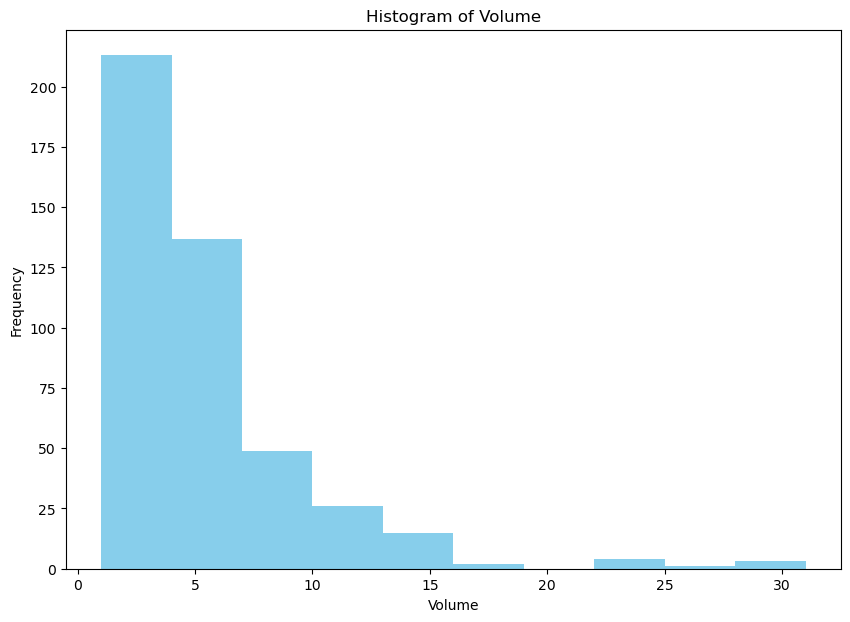

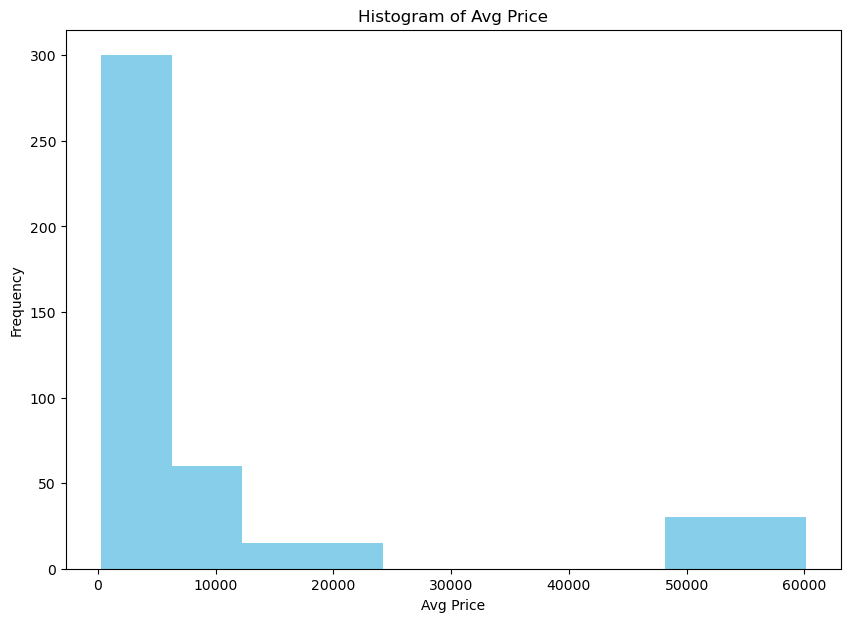

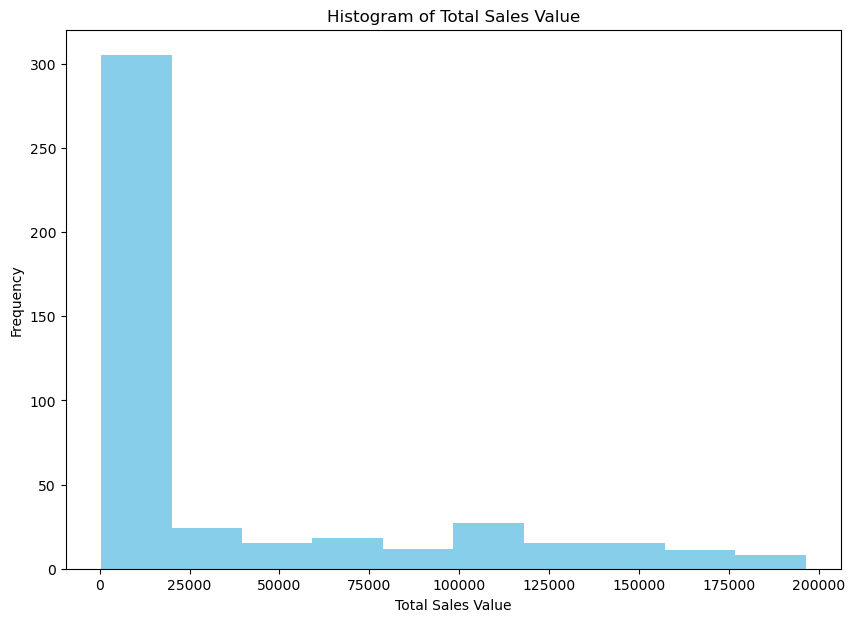

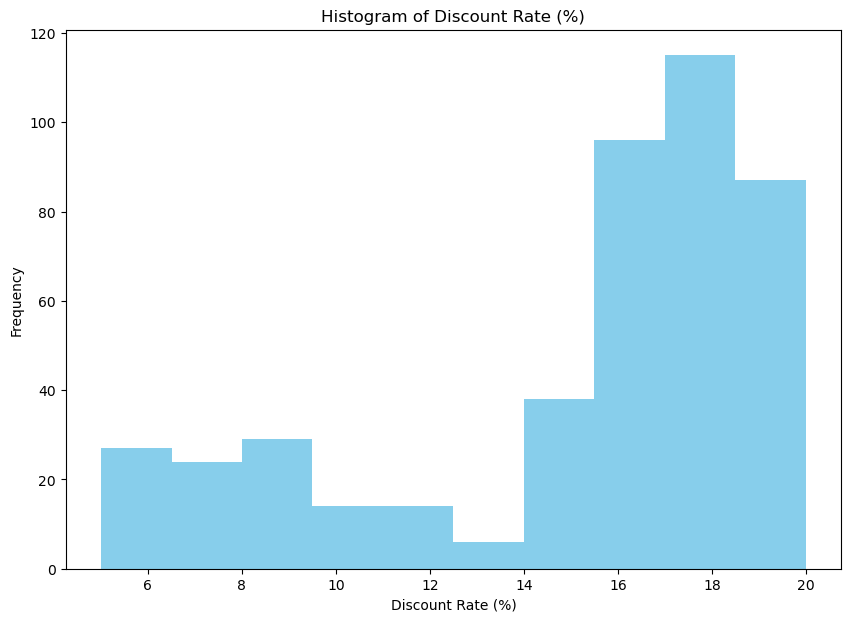

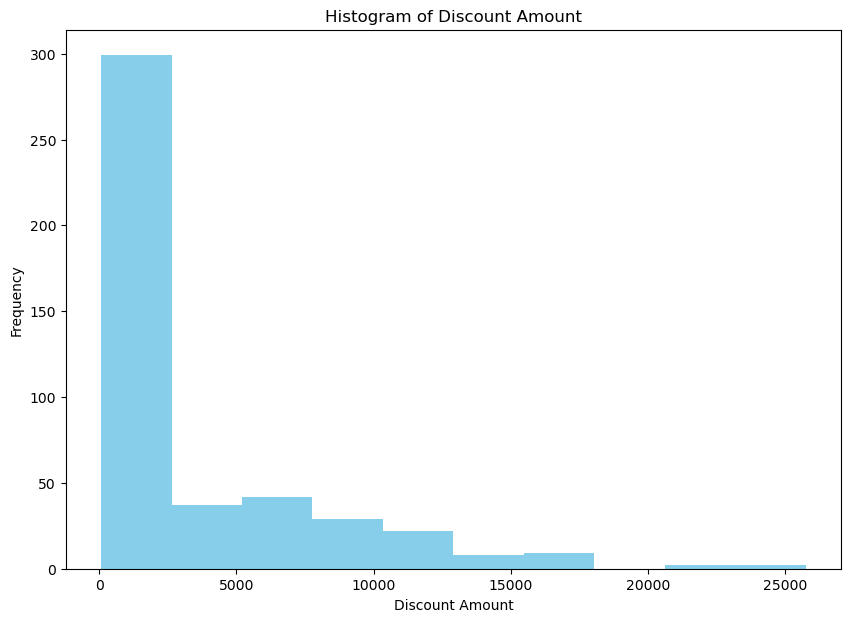

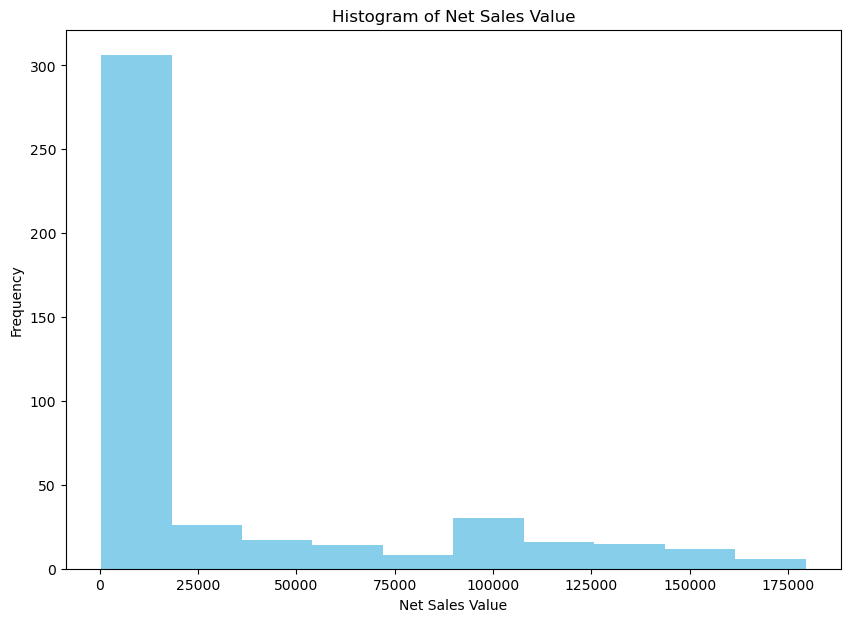

In [39]:
#	Plot histograms for each numerical column.
import matplotlib.pyplot as plt
for column in num_df:
    plt.figure(figsize=(10, 7))
    plt.hist(df[column], bins=10 , color = "skyblue")
    plt.title(f"Histogram of {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.show()

In [33]:
#   Analyze the distribution (e.g., skewness, presence of outliers) and provide inferences.

for i in cols :
    skewness = df[i].skew()
    print(f"Skewness Of {i} is : {skewness}")

Skewness Of Volume is : 2.731723626557714
Skewness Of Avg Price is : 1.9088730767759727
Skewness Of Total Sales Value is : 1.5347293238977937
Skewness Of Discount Rate (%) is : -1.0622943696988825
Skewness Of Discount Amount is : 1.9130377339538271
Skewness Of Net Sales Value is : 1.5408217575344376


## Box Plots
- Create boxplots for numerical variables to identify outliers and the interquartile range.


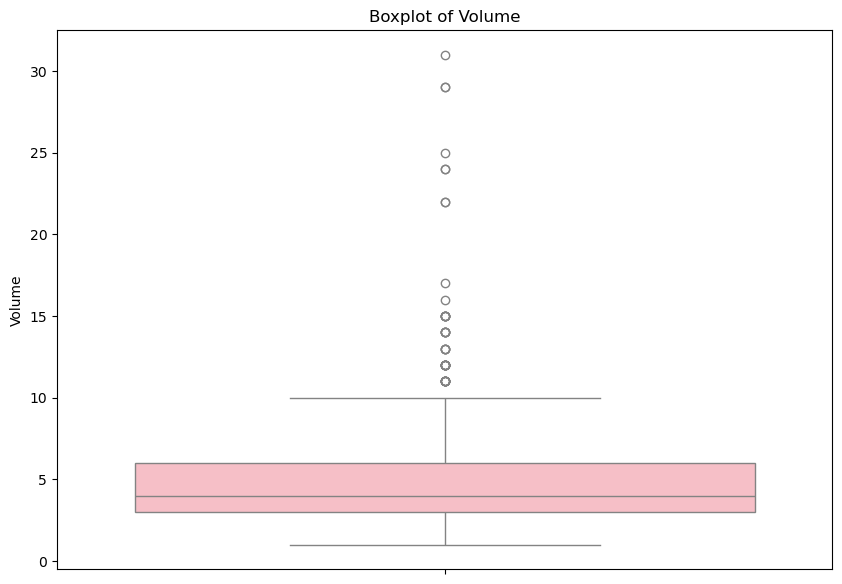

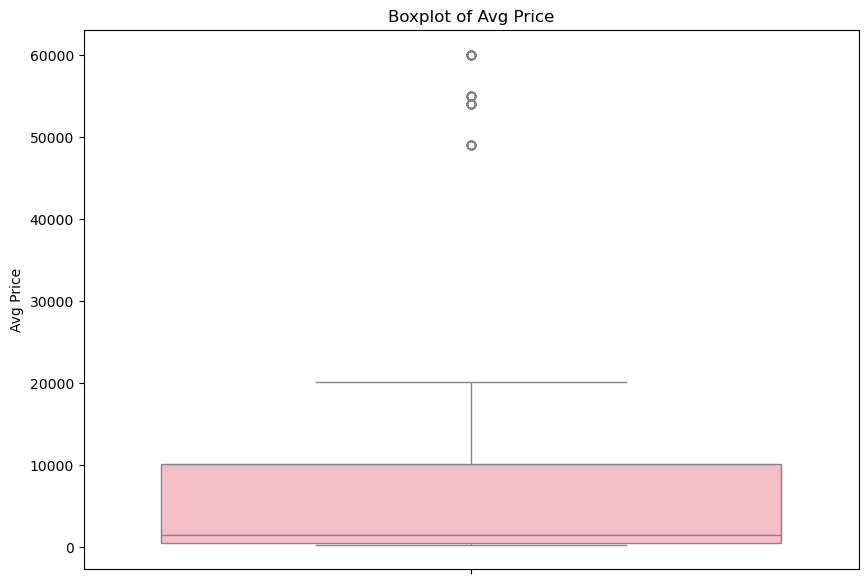

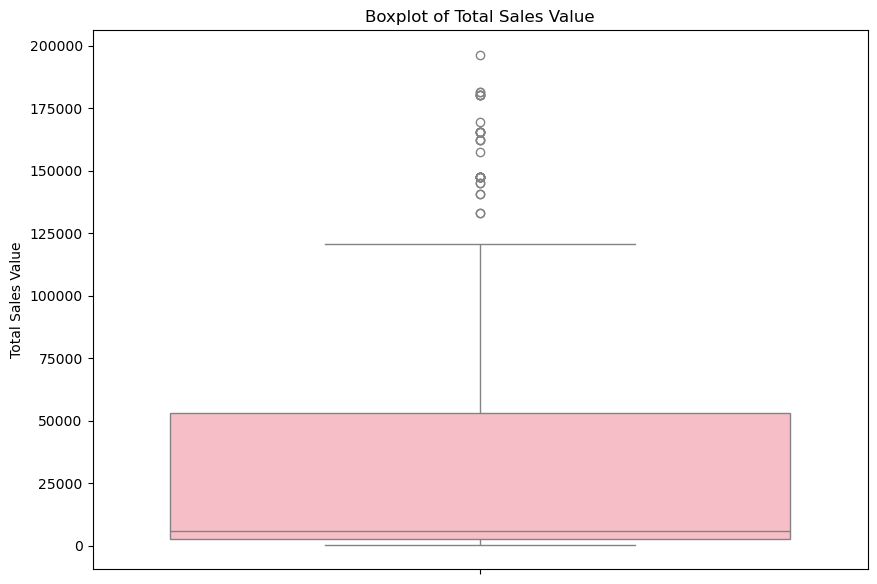

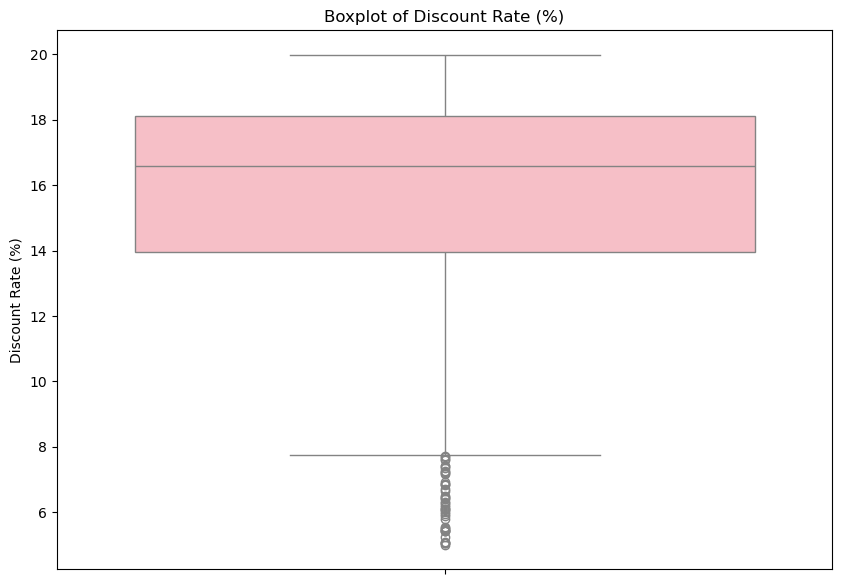

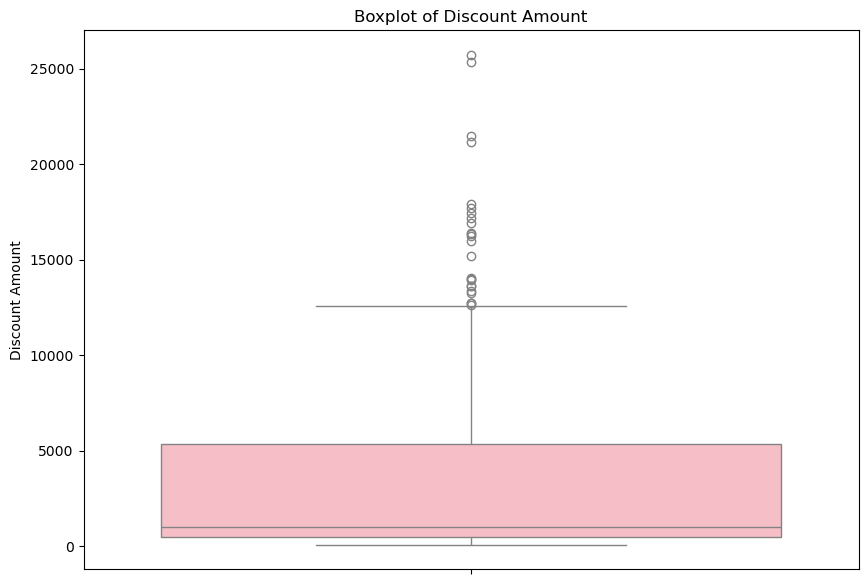

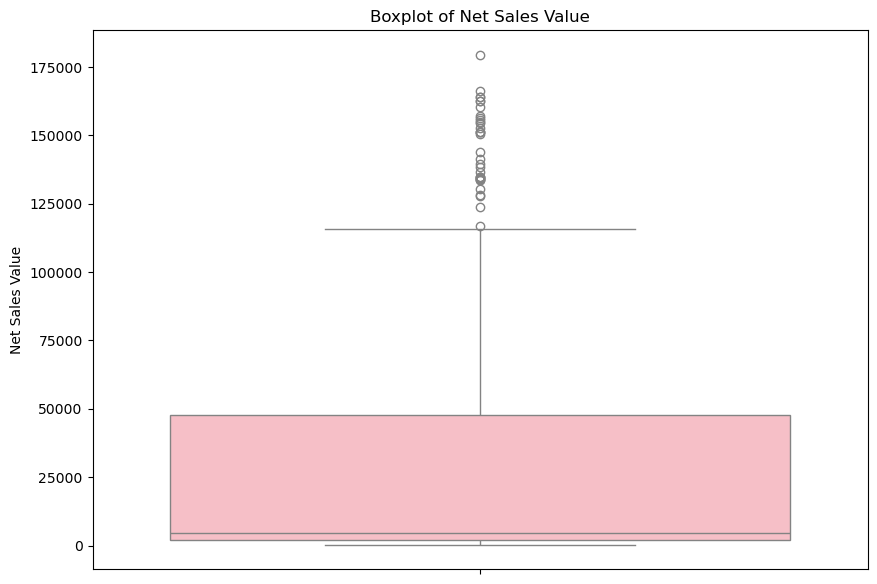

In [38]:
import seaborn as sns 

for column in num_df:
    plt.figure(figsize=(10, 7))
    sns.boxplot(df[column], vert=True , color = 'lightpink')
    plt.title(f"Boxplot of {column}")
    plt.ylabel(column)
    plt.show()

In [42]:
for i in cols :
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)

    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[i] < lower_bound) | (df[i] > upper_bound)]
    
    print(f"Column Name : {i}")
    print(f"IQR : {IQR}")
    print(f"Lower Bound : {lower_bound}")
    print(f"Upper Bound : {upper_bound}")
    print(f"No of Outliers : {len(outliers)}")
    print("_" * 50)

Column Name : Volume
IQR : 3.0
Lower Bound : -1.5
Upper Bound : 10.5
No of Outliers : 44
__________________________________________________
Column Name : Avg Price
IQR : 9635.0
Lower Bound : -13987.5
Upper Bound : 24552.5
No of Outliers : 60
__________________________________________________
Column Name : Total Sales Value
IQR : 50500.0
Lower Bound : -73050.0
Upper Bound : 128950.0
No of Outliers : 36
__________________________________________________
Column Name : Discount Rate (%)
IQR : 4.149655934050962
Lower Bound : 7.740578642625298
Upper Bound : 24.339202378829146
No of Outliers : 45
__________________________________________________
Column Name : Discount Amount
IQR : 4856.03612280112
Lower Bound : -6823.594880316146
Upper Bound : 12600.54961088833
No of Outliers : 24
__________________________________________________
Column Name : Net Sales Value
IQR : 45645.70420627015
Lower Bound : -66266.347664084
Upper Bound : 116316.46916099661
No of Outliers : 35
_________________________

#### Discuss any findings, such as extreme values or unusual distributions

#### 1. Total_Amount
- Distribution: Right-skewed.
- Skewness: Likely > 1 (positive skew).

- Outliers:
    - High number of extreme values (top 5% are much larger).
    - Could represent bulk orders or manual entry errors.

- Inference:
    - Most sales are small to moderate.
    - Use log transformation if modeling.
    - Review top 1% for possible data cleaning.

#### 2. Discount_Amount
- Distribution: Highly skewed.

- Outliers: Present above upper bound.

- Observation:
    - Some discounts are abnormally high.
    - May be due to promotional campaigns or data entry issues.

- Action:
    - Flag and validate extreme discount values.
    - Consider treating outliers separately in pricing analysis.

#### 3. Quantity
- Distribution: Often left-skewed (more low quantities like 1–3 items).

- Outliers: Large quantities may indicate bulk orders.

- Inference:
    - Data reflects mostly individual customers.
    - Bulk purchases should be analyzed separately (e.g., B2B sales).

#### 4. Unit_Price
- Distribution: Slightly right-skewed.

- Outliers:
    - High unit prices may be premium products.

#### Suggestion:
- Analyze price tiers (low, mid, premium).
- Group by product category if available.

## Bar Chart Analysis for Categorical Column:
- Identify categorical columns in the dataset.- 	Create bar charts to visualize the frequency or count of each category
- 
	Analyze the distribution of categories and provide insights.


In [45]:
#Identify categorical columns in the dataset.
cat_df = df.select_dtypes(include=["object"])
cat_df.head()

,Date,Day,SKU,City,BU,Brand,Model
0,01-04-2021,Thursday,M01,C,Mobiles,RealU,RU-10
1,01-04-2021,Thursday,M02,C,Mobiles,RealU,RU-9 Plus
2,01-04-2021,Thursday,M03,C,Mobiles,YouM,YM-99
3,01-04-2021,Thursday,M04,C,Mobiles,YouM,YM-99 Plus
4,01-04-2021,Thursday,M05,C,Mobiles,YouM,YM-98


In [52]:
for col in cat_df :
    print(f"Column Name : {col}")
    print(df[col].value_counts())
    print("_" * 50)
    

Column Name : Date
Date
01-04-2021    30
02-04-2021    30
03-04-2021    30
04-04-2021    30
05-04-2021    30
06-04-2021    30
07-04-2021    30
08-04-2021    30
09-04-2021    30
10-04-2021    30
11-04-2021    30
12-04-2021    30
13-04-2021    30
14-04-2021    30
15-04-2021    30
Name: count, dtype: int64
__________________________________________________
Column Name : Day
Day
Thursday     90
Friday       60
Saturday     60
Sunday       60
Monday       60
Tuesday      60
Wednesday    60
Name: count, dtype: int64
__________________________________________________
Column Name : SKU
SKU
M01    15
M02    15
L09    15
L08    15
L07    15
L06    15
L05    15
L04    15
L03    15
L02    15
L01    15
F10    15
F09    15
F08    15
F07    15
F06    15
F05    15
F04    15
F03    15
F02    15
F01    15
M10    15
M09    15
M08    15
M07    15
M06    15
M05    15
M04    15
M03    15
L10    15
Name: count, dtype: int64
__________________________________________________
Column Name : City
City
C    450
N

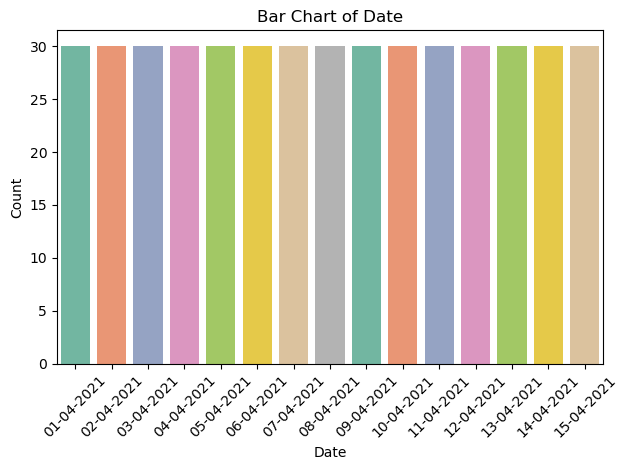

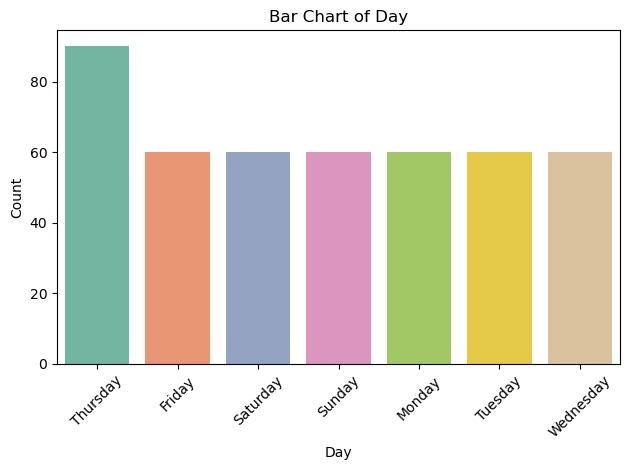

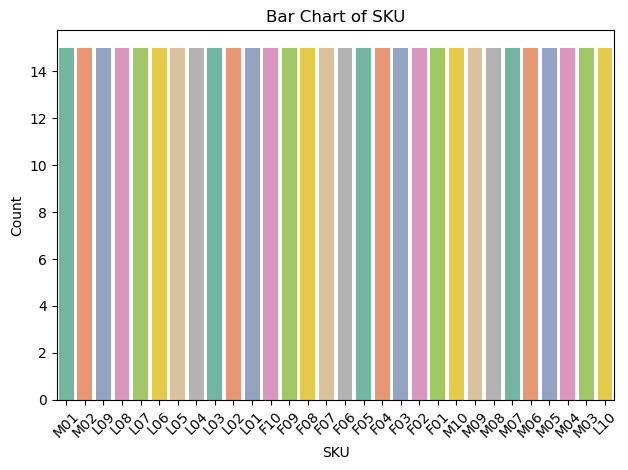

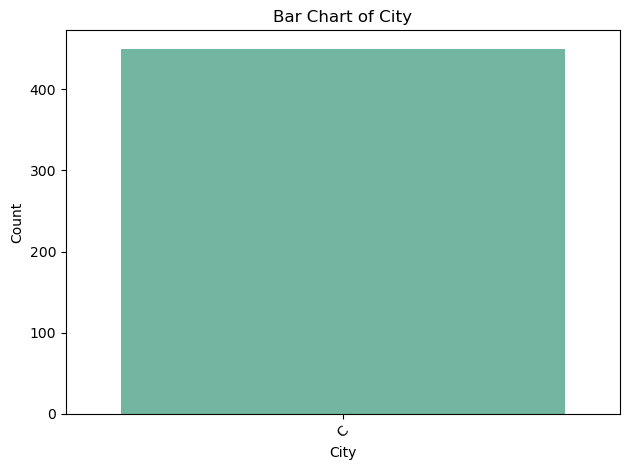

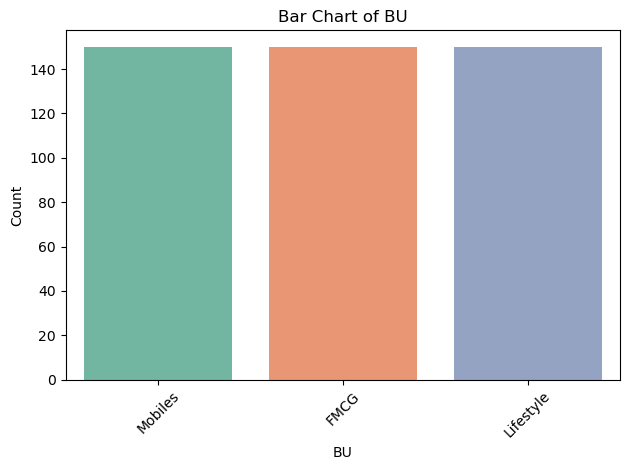

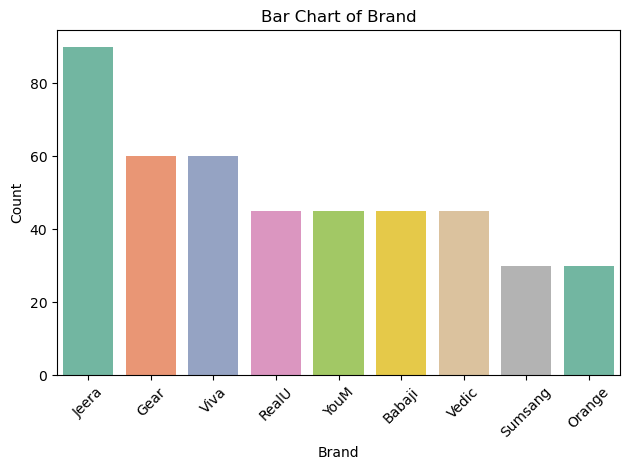

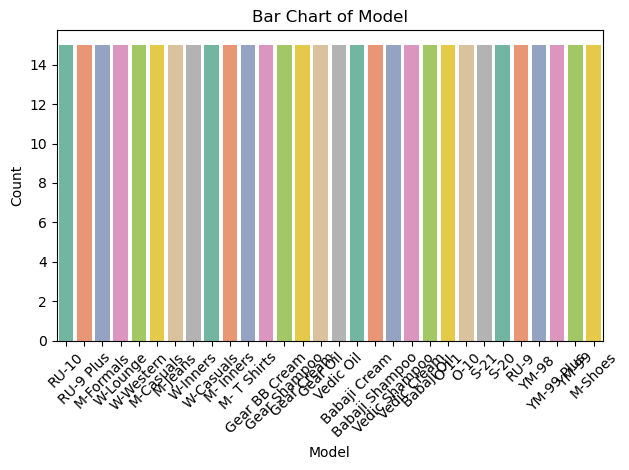

In [56]:
#Create bar charts to visualize the frequency or count of each category
import warnings
warnings.filterwarnings("ignore")

for col in cat_df:
    plt.figure()
    sns.countplot(x=col, data=df, order=df[col].value_counts().index , palette = 'Set2')
    plt.title(f'Bar Chart of {col}')
    plt.xticks(rotation=45)
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()

### Analyze the distribution of categories and provide insights.

#### Date
- Each date has exactly 30 records.
- Indicates a uniform distribution across dates.
- No missing or dominant date.

- Insight:
    - Data is evenly collected across all dates, making time-based analysis unbiased.
### Day
- Thursday (90) has a noticeably higher count than other days (60 each).
- Other weekdays and weekends are evenly distributed.

- Insight:
    - Thursday has higher activity, which may indicate higher sales or promotions on that day.

### SKU
- Every SKU appears exactly 15 times.
- Perfectly balanced distribution across all SKUs.

- Insight:
    - All SKUs are equally represented, ensuring no product-level sampling bias.

### City
- Only one city (C) with 450 records.

- Insight:
- The dataset is single-city focused, so findings cannot be generalized geographically.

### Business Unit (BU)
- Mobiles, FMCG, and Lifestyle each have 150 records.
- Completely balanced distribution.

- Insight:
    - Equal representation allows fair comparison across business units.

### Brand
- Uneven distribution:
- Jeera (90) is the most frequent brand.
- Gear & Viva (60 each) follow.
- Several brands have lower representation (30–45).

- Insight:
    - Sales are brand-concentrated, with a few brands dominating the dataset.

### Model
- Every model appears exactly 15 times.
- Uniform distribution across all models.

-Insight:
    - Model-level analysis is reliable since all models are equally represented.

## Conclusion
- Summarize the key findings from the descriptive analytics and data visualizations.

##### 1. Numerical Data Insights
- Sales and price-related variables (Average Price, Total Sales Value, Net Sales Value) show high variability with large standard deviations.
- The mean values are significantly higher than the medians, indicating right-skewed distributions caused by a small number of high-value transactions.
- Outliers are clearly present in sales-related metrics, reflecting occasional bulk or premium purchases.
- Discount Rate (%) remains relatively stable with low variation, suggesting a consistent discounting strategy.

##### 2. Distribution Patterns (Histograms & Boxplots)
- Most numerical variables exhibit right-skewness, with long tails toward higher values.
- Boxplots highlighted extreme high-end outliers, particularly in total and net sales values.
- Sales volume shows moderate variability, while monetary values fluctuate widely.

##### 3. Categorical Data Insights
- Dates, SKUs, Models, and Business Units are uniformly distributed, ensuring balanced and unbiased representation.
- Thursday shows higher activity compared to other days, indicating a potential sales or promotion pattern.
- Brand distribution is uneven, with a few brands dominating the dataset.
- The dataset is limited to a single city, meaning insights are location-specific.